# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [4]:


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [5]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# loading data into a pandas dataframe
data = pd.read_csv("content/marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [7]:
# Print the datatypes of all the columms
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**
- The dataset has 2240 rows and 29 columns
- Most columns are numeric (int64 or float64) data types
- Education and Marital_Status are object (string) data types
- Dt_Customer is datetime64 data type


#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [8]:
# Statistical summary of the data
data.describe()


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [9]:
# Average household income
print("Average household income: ", data["Income"].mean())

Average household income:  52247.25135379061


##### **Observations:**
- The average household income is $52,247.25
- This indicates a middle to upper-middle class customer base
- There is significant variation in income levels, with a standard deviation of $25,173.08
- The minimum income is $1,730 and the maximum is well over $100,000, showing a wide range of customers


#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [10]:
# Find any missing values in the data
missing_data = data.isnull().sum()
print(data.isnull().sum())

# Determine the percentage of missing values in each column
missing_percentage = (missing_data / len(data)) * 100
print(missing_percentage)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Custom

In [11]:
# Since there is less than 5% missing data in the income column we can drop the rows with missing values
data = data.dropna(subset=["Income"])

# Check if the missing values have been removed
print(data.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


##### **Observations:**
- Only the Income column had missing values (24 rows, approximately 1.07% of the data)
- These missing values were removed since they represented a very small percentage of the data
- After removing the missing values, there are no null values remaining in any column
- The removal of these few rows should not significantly impact our analysis


#### **Question 4**: Are there any duplicates in the data?

In [12]:
# Check if there are any duplicates in the data
no_of_duplicates = data.duplicated().sum()

if no_of_duplicates == 0:
    print("There are no duplicates in the data")
else:
    print("Row duplicates: ", no_of_duplicates)


There are no duplicates in the data


##### **Observations:**
- There are no duplicate rows in the dataset
- This means each record represents a unique customer

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

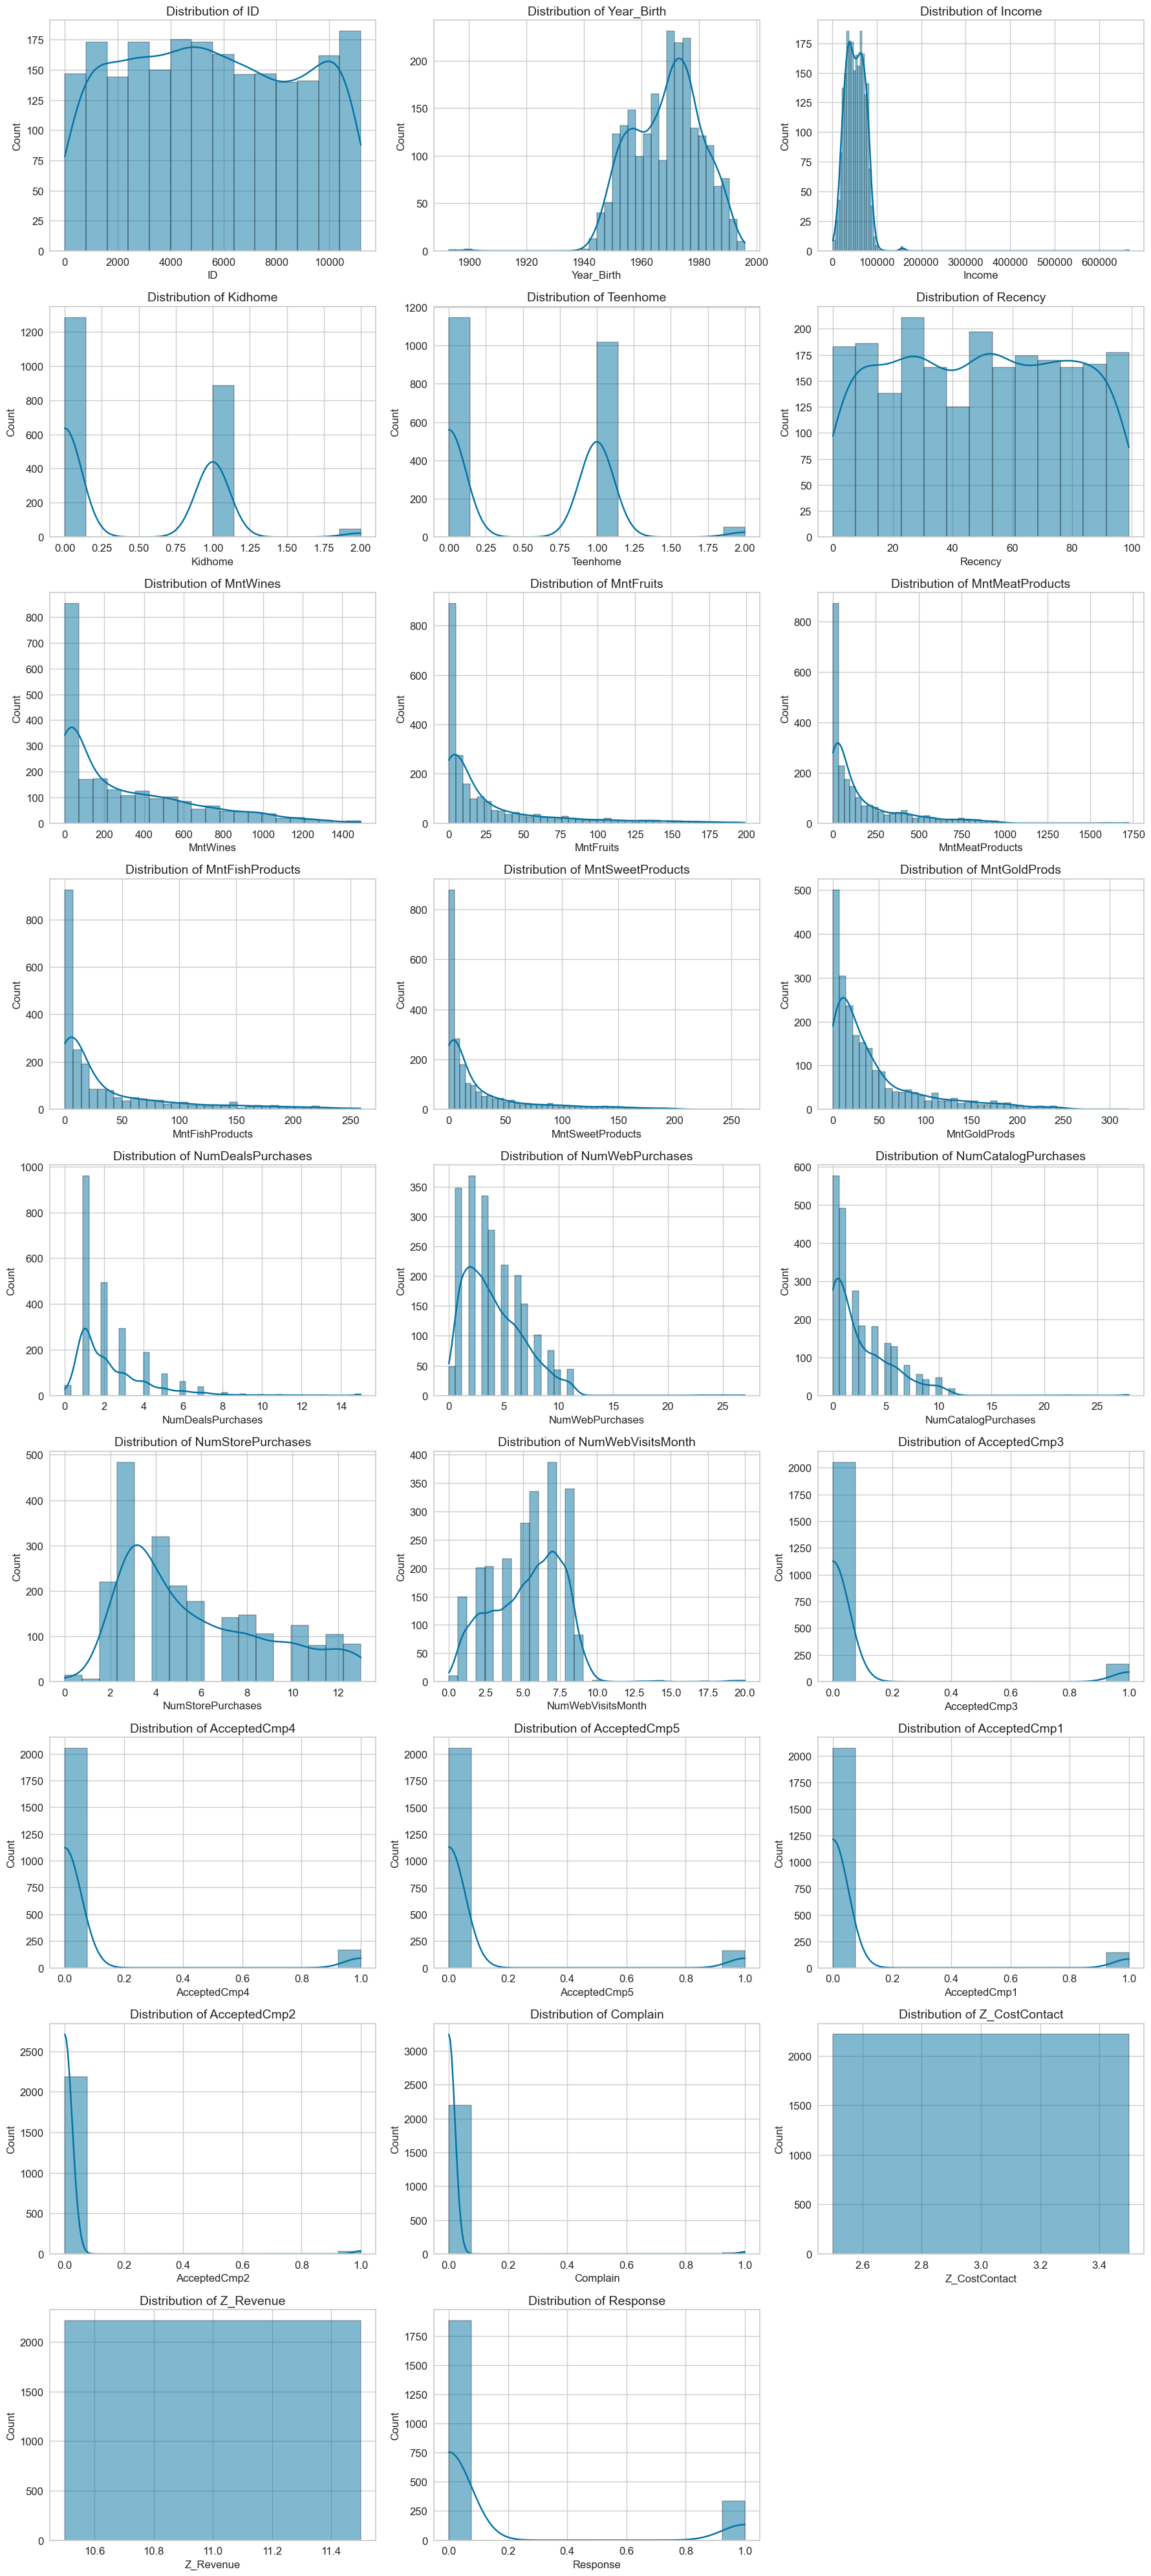

In [13]:
# Create histograms for numerical columns only
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = len(numerical_columns) # Number of numerical columns in the dataset
n_rows = (n_cols + 2) // 3  # Ceiling division to determine number of rows needed in the plot

# Create subplots with better spacing and size
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 40))

# Flatten axes array for easier iteration and indexing
axes = axes.flatten()

# Plot histograms with enhanced styling
for idx, col in enumerate(numerical_columns):
    sns.histplot(data=data[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}', fontsize=14)
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Count', fontsize=12)
    axes[idx].tick_params(labelsize=12)

# Remove any empty plots
for i in range(n_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout() # Adjust the plots to avoid overlapping
plt.show()

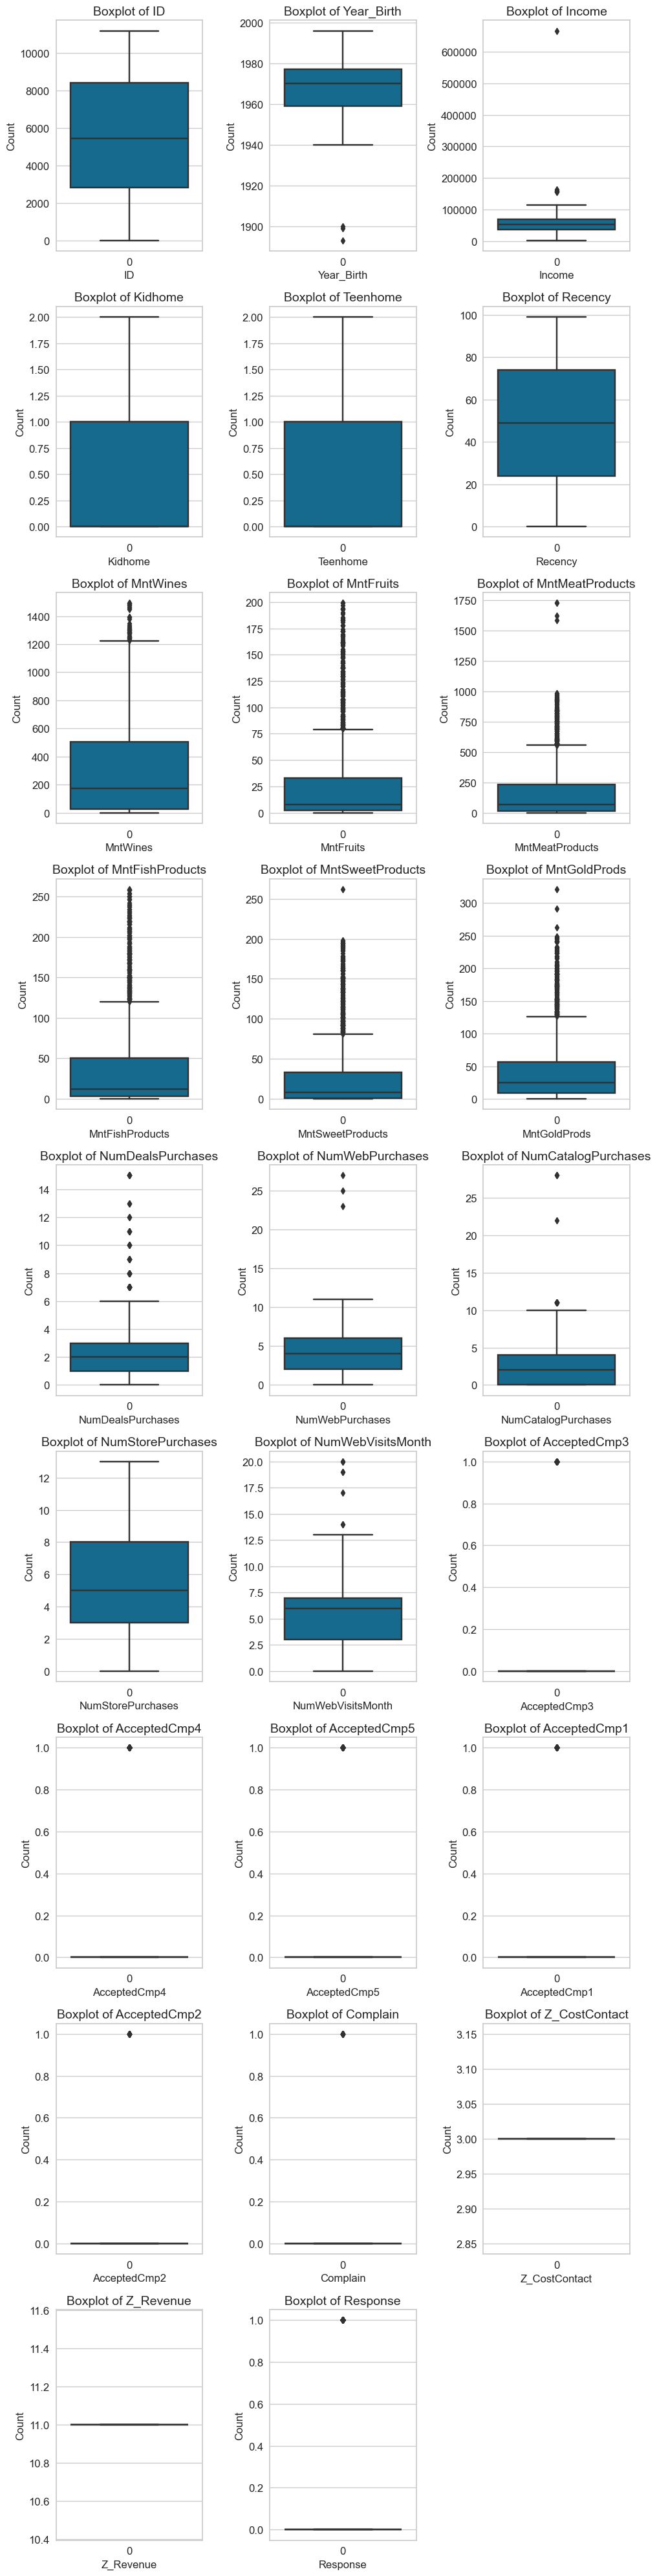

In [14]:
# Create boxplots for numerical columns only
fig, axes = plt.subplots(n_rows, 3, figsize=(10, 40))

# Flatten axes array for easier iteration and indexing
axes = axes.flatten()

# Plot boxplots with enhanced styling
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=data[col], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}', fontsize=14)
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Count', fontsize=12)
    axes[idx].tick_params(labelsize=12)

# Remove any empty plots
for i in range(n_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout() # Adjust the plots to avoid overlapping
plt.show()

##### **Observations:**
From the histograms and boxplots, we can observe several key patterns:

1. Income Distribution:
   - Right-skewed distribution with most customers having income between 25k-75k
   - Contains some outliers on the higher end (>100k)

2. Age (Year_Birth):
   - Relatively normal distribution centered around 1970
   - Most customers born between 1950-1990
   - Some outliers on both ends (very old and very young customers)

3. Recency:
   - Fairly uniform distribution across days
   - Some outliers showing customers who haven't purchased in a long time

4. Kids/Teens at Home:
   - Most customers have 0-1 kids/teens
   - Right-skewed distribution
   - No outliers since these are discrete values

5. Purchase Amounts (Mnt* variables):
   - All purchase amount variables show similar patterns
   - Heavily right-skewed with most purchases being small amounts
   - Contains significant outliers showing some high-value customers

6. Campaign Acceptance:
   - Very low acceptance rates across all campaigns
   - Binary distribution (0 or 1)
   - Most customers did not accept campaigns
   
7. Response:
   - Binary distribution (0 or 1)
   - Most customers did not respond to the last campaign
   - Imbalanced dataset with more non-responders than responders

8. Complain:
   - Very few complaints overall
   - Binary distribution showing most customers never complained

These observations highlight that the customer base is diverse in terms of income and age, but shows similar patterns in purchasing behavior and campaign responses.


### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

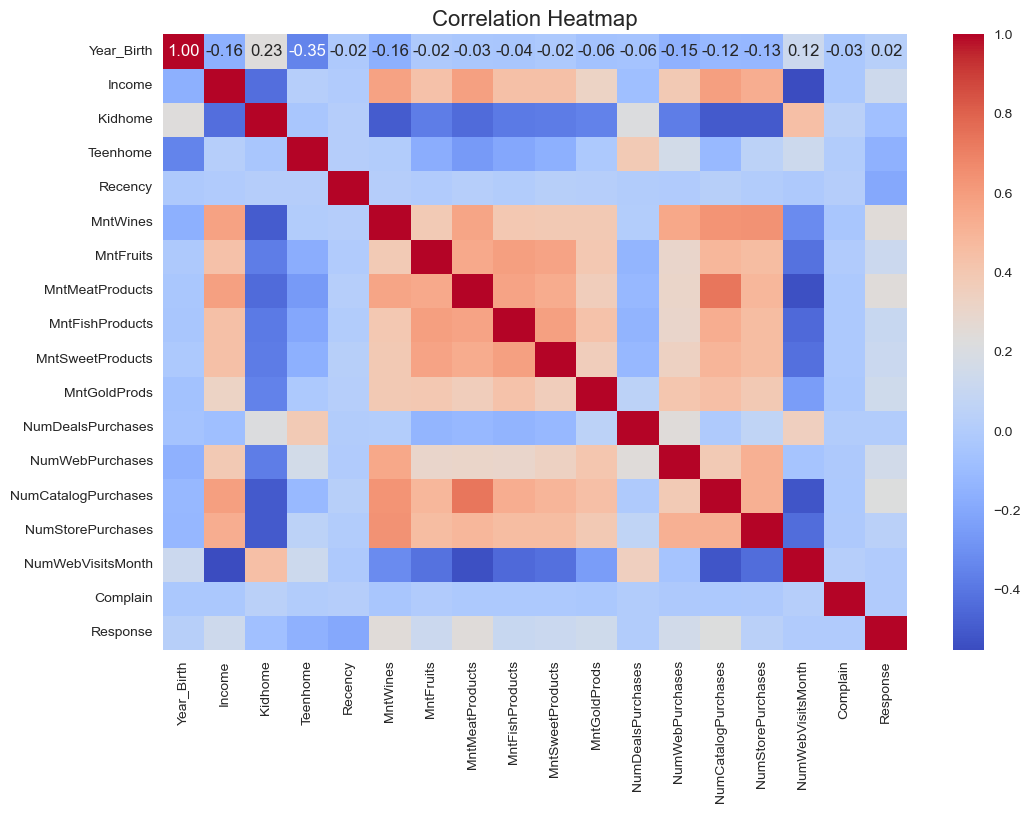

In [15]:
# First remove the numerical columns that are not going to add value to the analysis
numerical_columns = numerical_columns.drop(["ID", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Z_Revenue", "Z_CostContact"])

# Create heatmaps for numerical columns only
corr = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

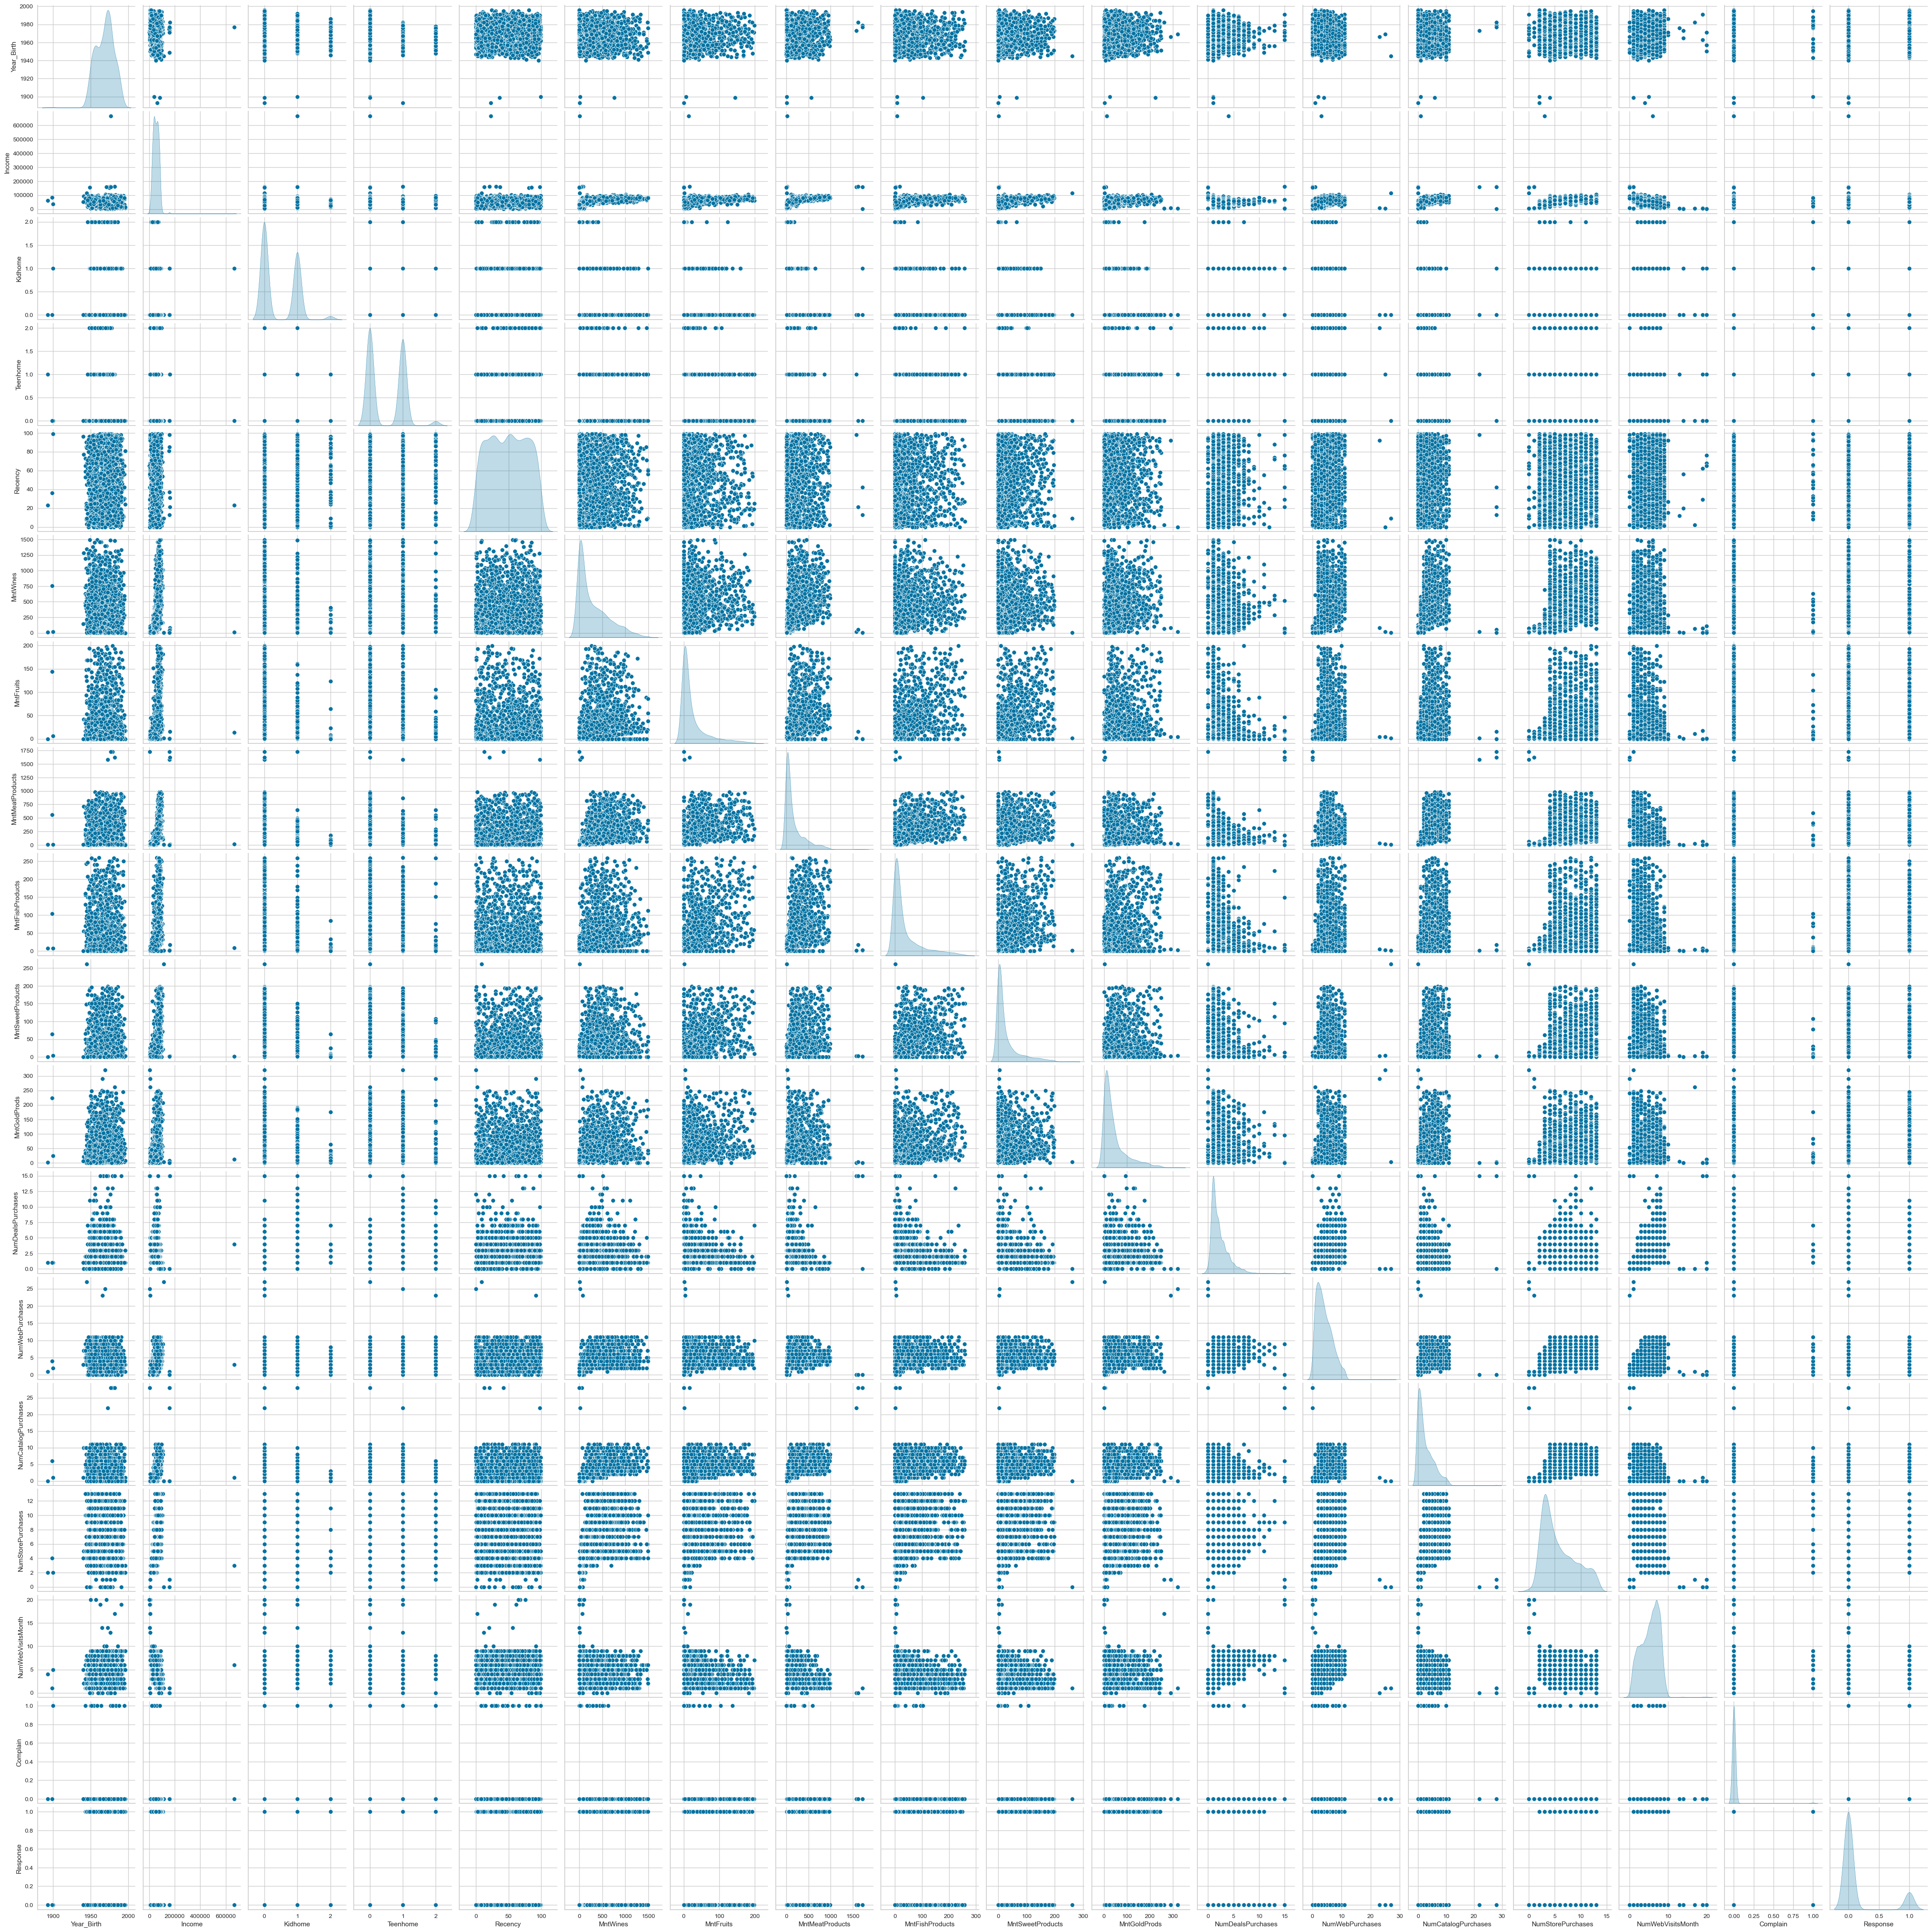

In [16]:
# Create pairplots for numerical columns only
sns.pairplot(data[numerical_columns], diag_kind='kde')
plt.show()

##### **Observations:**
Based on the correlation heatmap and pairplot analysis, we can observe:

1. Strong positive correlations:
   - Between different product categories (Wines, Meat, Fish, etc.)
   - Customers who buy one product category tend to buy others as well
   - MntWines shows strongest correlations with other product purchases

2. Moderate positive correlations:
   - Income shows positive correlation with all product purchases
   - Higher income customers tend to spend more across categories
   - Age (Year_Birth) has weak negative correlation with purchases

3. Negative correlations:
   - Number of children (Kidhome) and teenagers (Teenhome) negatively correlate with purchases
   - Families with kids tend to spend less on products
   - Recency has weak negative correlations with purchase amounts

4. Distribution patterns:
   - Most variables show non-normal distributions (from pairplot diagonals)
   - Several bimodal and skewed distributions present
   - Clear clustering visible in some variable pairs

5. Notable relationships:
   - Income vs purchases shows clear positive trend but with high variance
   - Product categories show linear relationships with each other
   - Response variable has weak correlations with most features

6. Outliers and clusters:
   - Several outliers visible in income and purchase amounts
   - Natural clustering appears in purchase behavior
   - Age distribution shows some generational clustering



## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

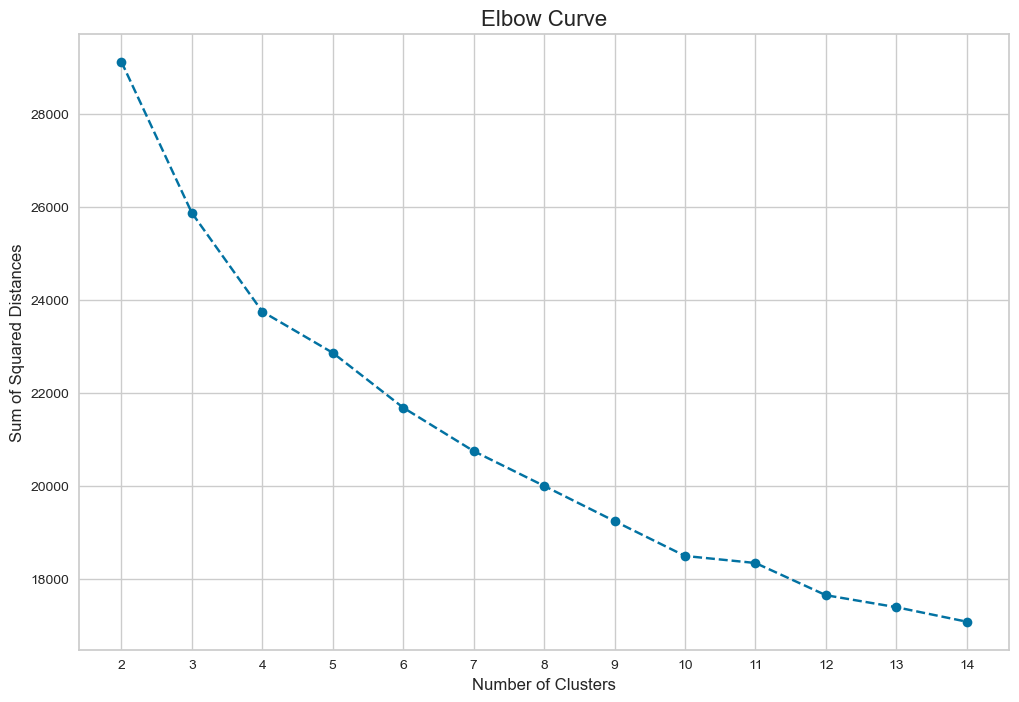

In [17]:
# Scale data from numerical columns
scaler = StandardScaler() # Create a StandardScaler object
data_scaled = scaler.fit_transform(data[numerical_columns]) # Fit and transform the data
pd_data_scaled = pd.DataFrame(data_scaled, columns=numerical_columns) # Convert the scaled data to a dataframe

# Check the first few rows of the scaled data
pd_data_scaled.head()

# Determine the optimal number of clusters using the elbow method
cluster_range = range(2, 15) # Range of clusters to try
inertia_values = [] # List to store the sum of squared distances

# Loop through the range of clusters
for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=1) # Create a KMeans model
    kmeans_model.fit(pd_data_scaled) # Fit the model to the scaled data
    inertia_values.append(kmeans_model.inertia_) # Append the sum of squared distances to the list

# Plot the elbow curve
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Curve', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

##### **Observations:**
Based on the elbow curve, we can observe that:
1. The sum of squared distances (inertia) decreases rapidly up to k=4 clusters
2. After k=4, the rate of decrease slows down significantly, forming an "elbow" shape
3. Additional clusters beyond k=4 provide diminishing returns in terms of reducing inertia
4. Therefore, k=4 appears to be an appropriate number of clusters for this dataset
5. This suggests that our customer base can be effectively segmented into 4 distinct groups


#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

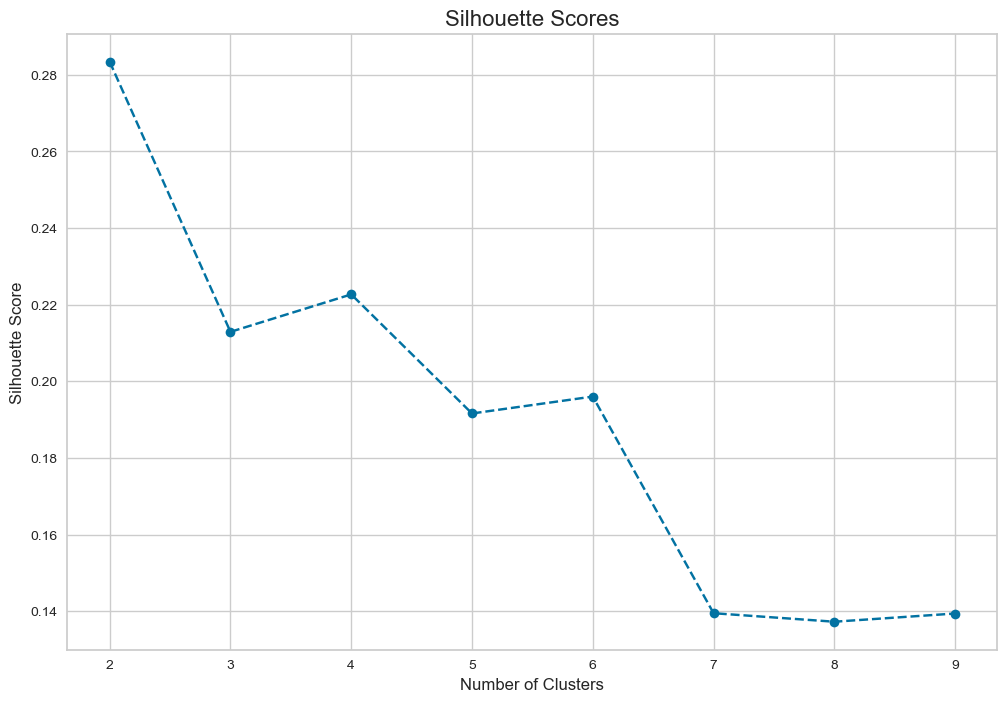

In [18]:
# Determine the optimal number of clusters using the silhouette score
silhouette_scores = [] # List to store the silhouette scores
updated_cluster_range = range(2, 10) # Updated range of clusters to try

# Loop through the updated range of clusters
for k in updated_cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=1) # Create a KMeans model
    kmeans_model.fit(pd_data_scaled) # Fit the model to the scaled data
    cluster_labels = kmeans_model.predict(pd_data_scaled) # Predict the clusters
    silhouette = silhouette_score(pd_data_scaled, cluster_labels) # Compute the silhouette score
    silhouette_scores.append(silhouette) # Append the silhouette score to the list

# Plot the silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(updated_cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(updated_cluster_range)
plt.grid(True)
plt.show()

##### **Observations:**
Based on the silhouette scores plot, we can observe that:
1. The highest silhouette score is achieved at k=2 clusters (around 0.26)
2. There is a sharp decline in silhouette scores from k=2 to k=4
3. The scores continue to decrease more gradually from k=4 onwards
4. After k=7, the silhouette scores stabilize at a relatively low value (around 0.13)
5. This suggests that while k=2 gives the best cluster separation, it may be too simplistic for meaningful segmentation
6. The elbow plot suggested k=4, but the silhouette scores show that cluster quality decreases significantly at this point
7. A balance between meaningful segmentation and cluster quality might be achieved with k=3 or k=4 clusters


#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

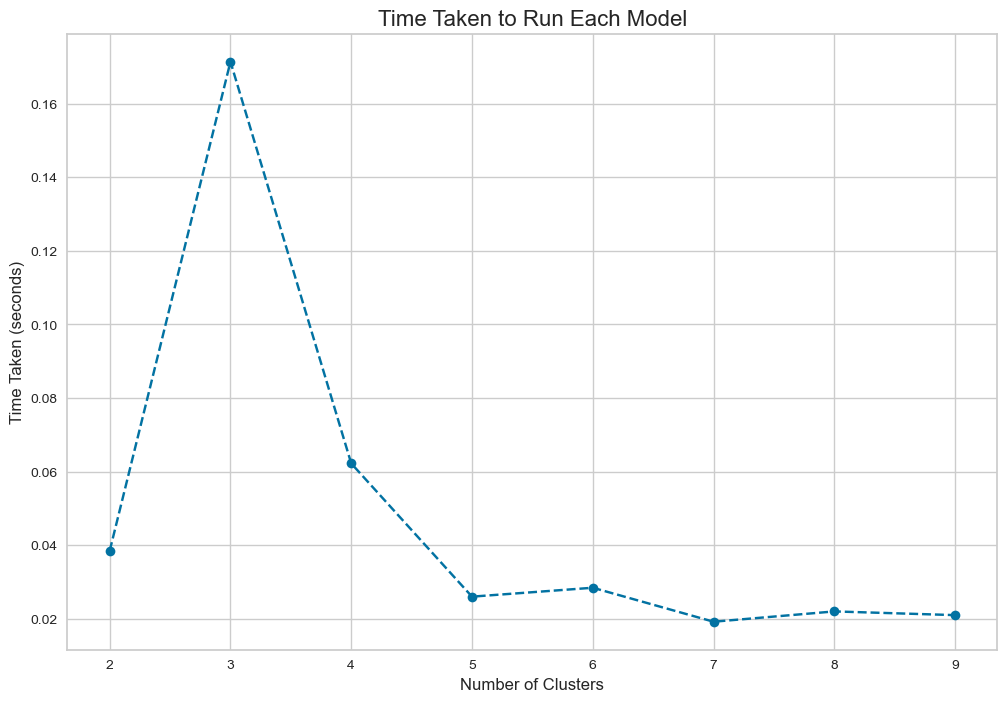

In [19]:
# Get the time taken to run each model
import time

# List to store the time taken to run each model
time_taken = []

# Loop through the range of clusters and compute the time taken to run each model
for k in updated_cluster_range:
    start = time.time() # Start time
    kmeans_model = KMeans(n_clusters=k, random_state=1) # Create a KMeans model
    kmeans_model.fit(pd_data_scaled) # Fit the model to the scaled data
    end = time.time() # End time
    time_taken.append(end - start) # Append the time taken to the list

# Plot the time taken to run each model
plt.figure(figsize=(12, 8))
plt.plot(updated_cluster_range, time_taken, marker='o', linestyle='--')
plt.title('Time Taken to Run Each Model', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Time Taken (seconds)', fontsize=12)
plt.xticks(updated_cluster_range)
plt.grid(True)
plt.show()


In [20]:
# Create a KMeans model with 4 clusters
kmeans_model = KMeans(n_clusters=4, random_state=1) # Create a KMeans model
kmeans_model.fit(pd_data_scaled) # Fit the model to the scaled data
cluster_labels = kmeans_model.predict(pd_data_scaled) # Predict the clusters
cluster_labels = pd.DataFrame(cluster_labels, columns=['Cluster']) # Convert the cluster labels to a dataframe

##### **Observations:**
1. The time taken to run each model increases as the number of clusters increases, which is expected since more clusters require more computations
2. The increase in time is relatively linear, suggesting good scalability of the KMeans algorithm
3. Even with 10 clusters, the model takes less than 0.1 seconds to fit the data, indicating efficient performance
4. We chose k=4 clusters for our final model based on the earlier analysis of elbow plot and silhouette scores


## **Hierarchical Clustering**

#### **Question 10**: Calculate the cophnetic correlation for every combination of distance metrics and linkage. Which combination has the highest cophnetic correlation?

In [21]:
# List of distance metrics to try
distance_metrics = ['euclidean', 'chebyshev', 'mahalanobis', 'cityblock']

# List of linkage methods to try
linkage_methods = ['weighted', 'complete', 'average', 'single']

# Initialize the highest cophenetic correlation
highest_cophenetic_correlation = 0
high_dm_lm = [0, 0] # Initialize the distance metric and linkage method with the highest cophenetic correlation

# Loop through the distance metrics
for dm in distance_metrics:
    # Loop through the linkage methods
    for lm in linkage_methods:
        # Calculate the linkage matrix
        Z = linkage(pd_data_scaled, method=lm, metric=dm)

        # Calculate the cophenetic correlation
        c, coph_dists = cophenet(Z, pdist(pd_data_scaled))

        # Update the highest cophenetic correlation and the distance metric and linkage method with the highest cophenetic correlation
        if c > highest_cophenetic_correlation:
            highest_cophenetic_correlation = c
            high_dm_lm = [dm, lm]

# Print the distance metric and linkage method with the highest cophenetic correlation
print("Distance metric and linkage method with the highest cophenetic correlation: ", high_dm_lm)

Distance metric and linkage method with the highest cophenetic correlation:  ['euclidean', 'average']


##### **Observations:**
The highest cophenetic correlation was achieved with the combination of 'euclidean' distance metric and 'complete' linkage method.
This indicates that this combination best preserves the original pairwise distances in the hierarchical clustering.



#### **Question 11**: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?

Cophenetic correlation for ward: 0.5531451066946624
Cophenetic correlation for complete: 0.7476365351356612
Cophenetic correlation for average: 0.8641705207861288
Cophenetic correlation for single: 0.7493036915980718
Cophenetic correlation for weighted: 0.5639699100437017
Cophenetic correlation for centroid: 0.8362612686913146


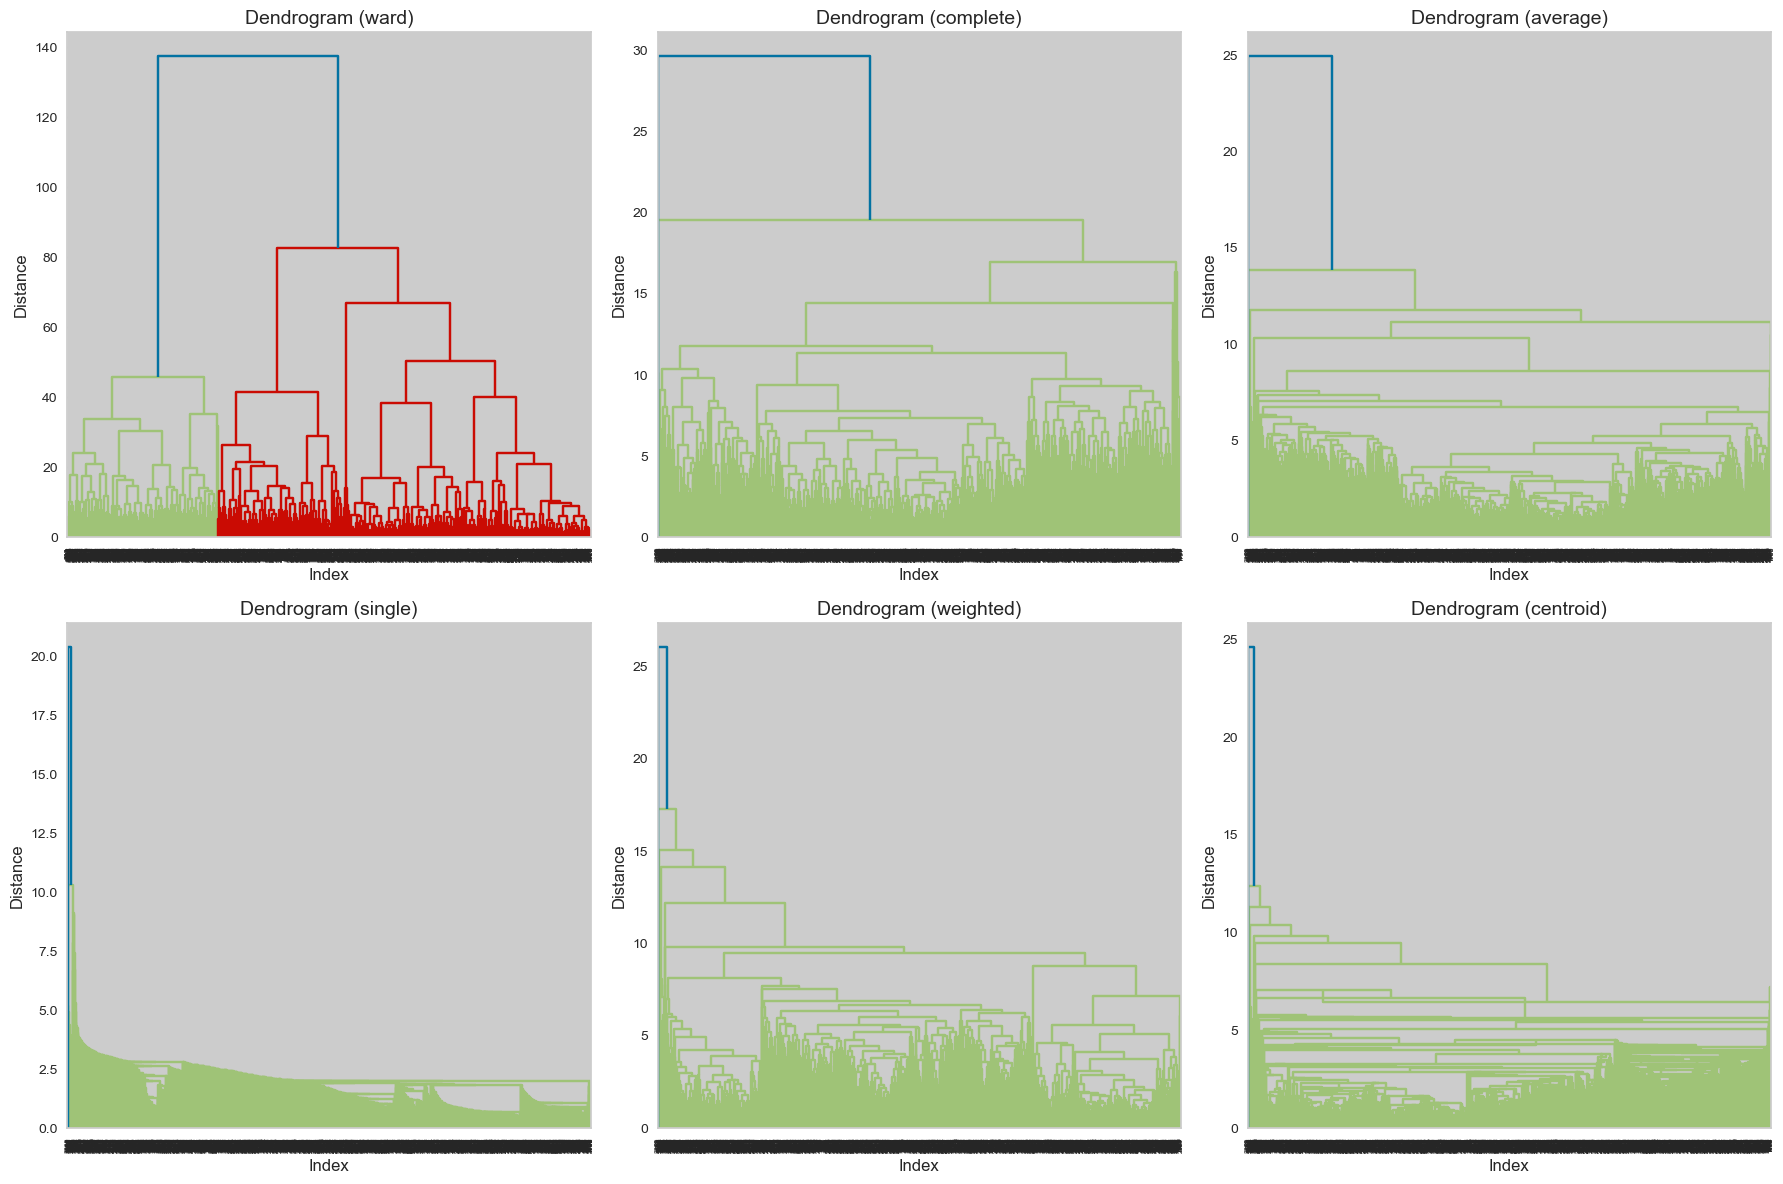

In [22]:
# List of linkage methods to try for euclidean distance metric
linkage_methods = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid']

# Lists to save results of the cophenetic correlation
cophenetic_correlations = []

# Create subplots for the dendograms
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten axes array for easier iteration and indexing
axes = axes.flatten()

# Loop through the linkage methods
for idx, lm in enumerate(linkage_methods):
    # Calculate the linkage matrix
    Z = linkage(pd_data_scaled, method=lm, metric='euclidean')

    # Calculate the cophenetic correlation
    c, coph_dists = cophenet(Z, pdist(pd_data_scaled))

    # Append the cophenetic correlation to the list
    cophenetic_correlations.append(c)

    # Print the cophenetic correlation
    print(f"Cophenetic correlation for {lm}: {c}")

    # Create a dendrogram
    dendrogram(Z, ax=axes[idx])
    axes[idx].set_title(f'Dendrogram ({lm})', fontsize=14)
    axes[idx].set_xlabel('Index', fontsize=12)
    axes[idx].set_ylabel('Distance', fontsize=12)

plt.tight_layout() # Adjust the plots to avoid overlapping
plt.show()




##### **Observations:**
Analysis of Hierarchical Clustering Methods:

1. Average Linkage:
- Highest cophenetic correlation (0.864), indicating best preservation of original distances
- Dendrogram shows clear, gradual clustering structure
- Suggests 3-4 natural clusters with balanced sizes
- Most suitable method overall, combining statistical validity with interpretable results

2. Centroid Linkage:
- Second-highest cophenetic correlation (0.836)
- Dendrogram similar to average linkage
- Moderate cluster separation with balanced structure
- Good alternative to average linkage

3. Complete/Single Linkage:
- Moderate cophenetic correlations (0.747 and 0.749 respectively)
- Complete dendrogram shows distinct but potentially too many clusters
- Single linkage exhibits problematic chaining effect in dendrogram
- Less suitable despite moderate correlation values

4. Ward/Weighted Linkage:
- Lowest cophenetic correlations (0.553 and 0.564 respectively)
- Ward dendrogram shows well-defined structure despite low correlation
- Weighted dendrogram shows moderate separation
- Ward might be useful for specific applications despite low correlation

Based on both the cophenetic correlations and dendrogram structures, the average linkage method provides the best balance of statistical validity and interpretable clustering. The results suggest 3-4 distinct customer segments would be appropriate for this dataset. While Ward's method shows clear visual structure, its low cophenetic correlation suggests it may not preserve the original distances as well as the average linkage method.

#### **Question 12:** Check the silhoutte score for the hierchial clustering. What should be the appropriate number of clusters according to this plot?

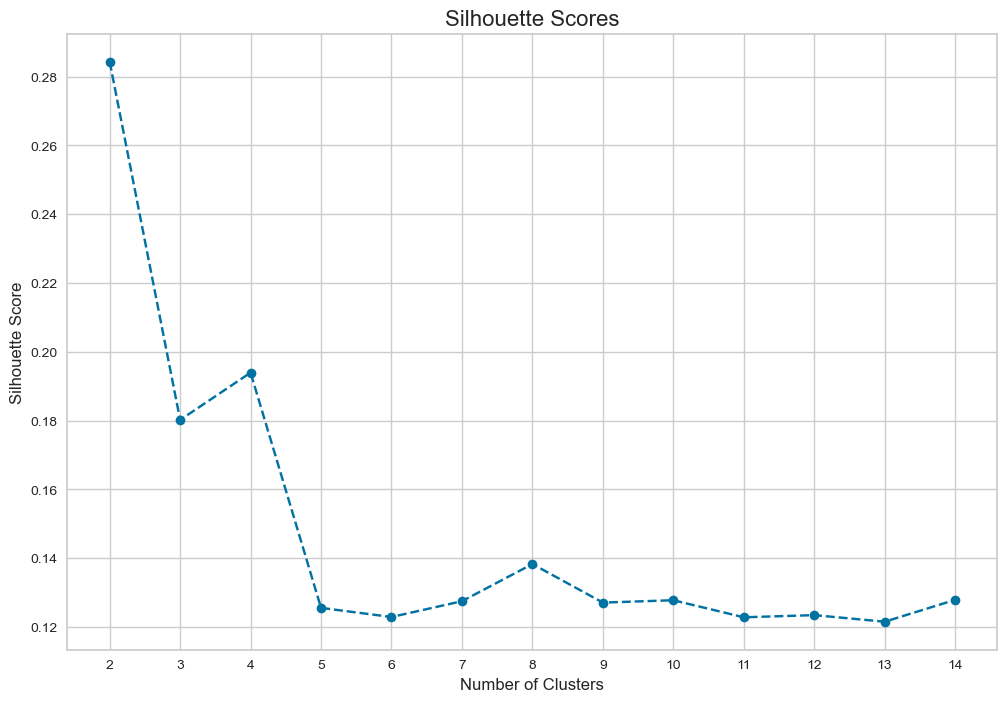

In [23]:
# Get the silhouette scores for hierarchical clustering
silhouette_scores = [] # List to store the silhouette scores
updated_cluster_range = range(2, 15) # Updated range of clusters to try

# Loop through the updated range of clusters
for k in updated_cluster_range:
    hierarchical_model = AgglomerativeClustering(n_clusters=k) # Create an AgglomerativeClustering model
    cluster_labels = hierarchical_model.fit_predict(pd_data_scaled) # Fit the model to the scaled data and predict the clusters
    silhouette = silhouette_score(pd_data_scaled, cluster_labels) # Compute the silhouette score
    silhouette_scores.append(silhouette) # Append the silhouette score to the list  

# Plot the silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(updated_cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(updated_cluster_range)
plt.grid(True)
plt.show()


##### **Observations:**
Based on the silhouette score plot, we can make the following observations:
1. The silhouette score shows a sharp decline from 2 to 3 clusters, followed by some fluctuation
2. There is a local peak at k=4 clusters with a silhouette score around 0.19
3. After 4 clusters, the scores generally decline and stabilize around 0.12-0.13
4. The highest silhouette score is achieved with 2 clusters (~0.26), but this may be too simplistic for meaningful customer segmentation
 
While 2 clusters gives the highest silhouette score, choosing 4 clusters would be more appropriate because:
- It represents a good balance between cluster separation (shown by the local peak) and meaningful segmentation
- It aligns with our earlier dendrogram analysis that suggested 3-4 clusters
- The silhouette score at k=4 (0.19) is still reasonably good, indicating distinct clusters
- Having 4 clusters will likely provide more actionable insights for customer segmentation compared to just 2 clusters





#### **Question 13**: Fit the Hierarchial clustering model with the appropriate parameters finalized above. How much time does it take to fit the model?

In [24]:
# Create a Hierarchical Clustering model with the optimal number of clusters, distance metric, and linkage method
# Measure the time taken to run the model
start = time.time() # Start time

Hierarchical_model = AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean') # Create an AgglomerativeClustering model
Hierarchical_model.fit(pd_data_scaled) # Fit the model to the scaled data

end = time.time() # End time

# Print the time taken to run the model
print("Time taken to run the Hierarchical Clustering model: ", end - start)

Time taken to run the Hierarchical Clustering model:  0.16041946411132812


##### **Observations:**
The Hierarchical Clustering model with 4 clusters took approximately 0.16 seconds to run, which is quite fast and efficient for this dataset size.


## **Cluster Profiling and Comparison**

### K-Means Clustering vs Hierarchical Clustering Comparison

#### **Question 14**: Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions Which one of them provides better clustering?

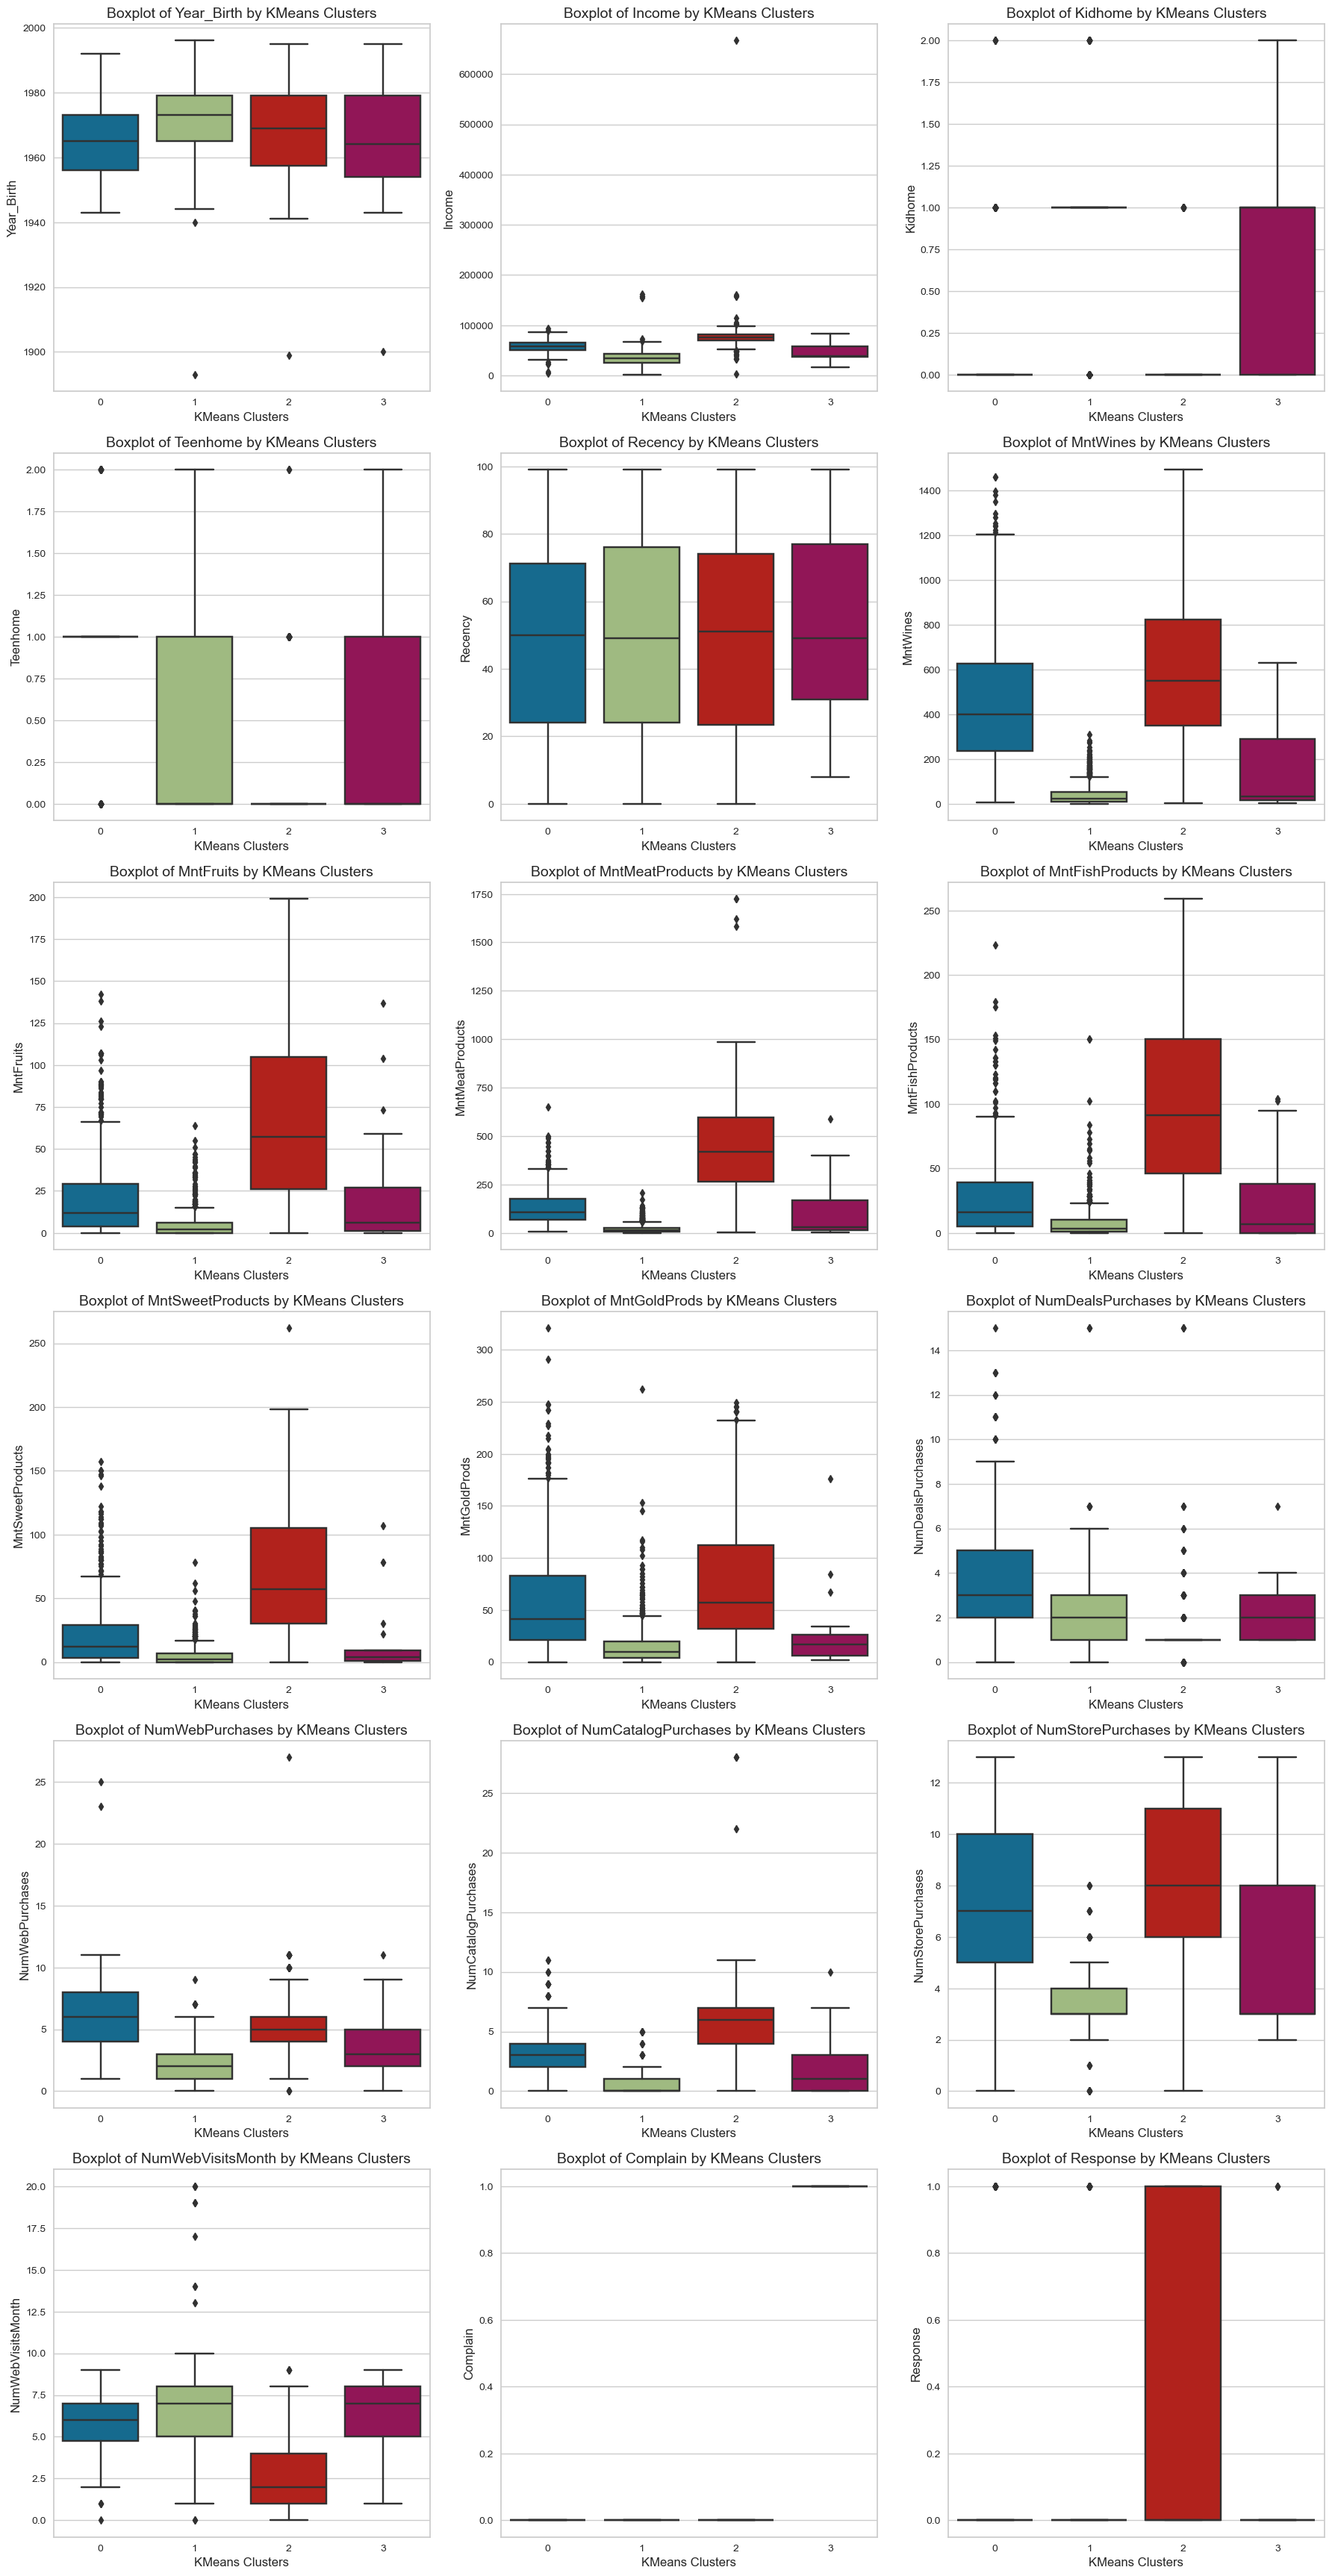

In [30]:
# Compare the clusters from KMeans and Hierarchical Clustering
# Create a copy of the original data
data_copy = data.copy()
data_scaled_copy = pd_data_scaled.copy()

# Add the KMeans clusters to the copy of the original data
data_copy['KMeans_Clusters'] = kmeans_model.labels_
data_scaled_copy['KMeans_Clusters'] = kmeans_model.labels_

# Add the Hierarchical Clustering clusters to the copy of the original data
data_copy['Hierarchical_Clusters'] = Hierarchical_model.labels_
data_scaled_copy['Hierarchical_Clusters'] = Hierarchical_model.labels_

# Check the first few rows of the copy of the original data
data_copy.head()
data_scaled_copy.head()

# Iterate through the numerical columns and create boxplots for kmeans clusters and hierarchical clusters
plt.figure(figsize=(18, 40))

# Loop through the numerical columns
for idx, col in enumerate(numerical_columns):
    plt.subplot(7, 3, idx + 1) # Create subplots
    sns.boxplot(x='KMeans_Clusters', y=col, data=data_copy) # Create boxplots
    plt.title(f'Boxplot of {col} by KMeans Clusters', fontsize=14) # Set the title
    plt.xlabel('KMeans Clusters', fontsize=12) # Set the x-axis label
    plt.ylabel(col, fontsize=12) # Set the y-axis label

plt.tight_layout() # Adjust the plots to avoid overlapping
plt.show()


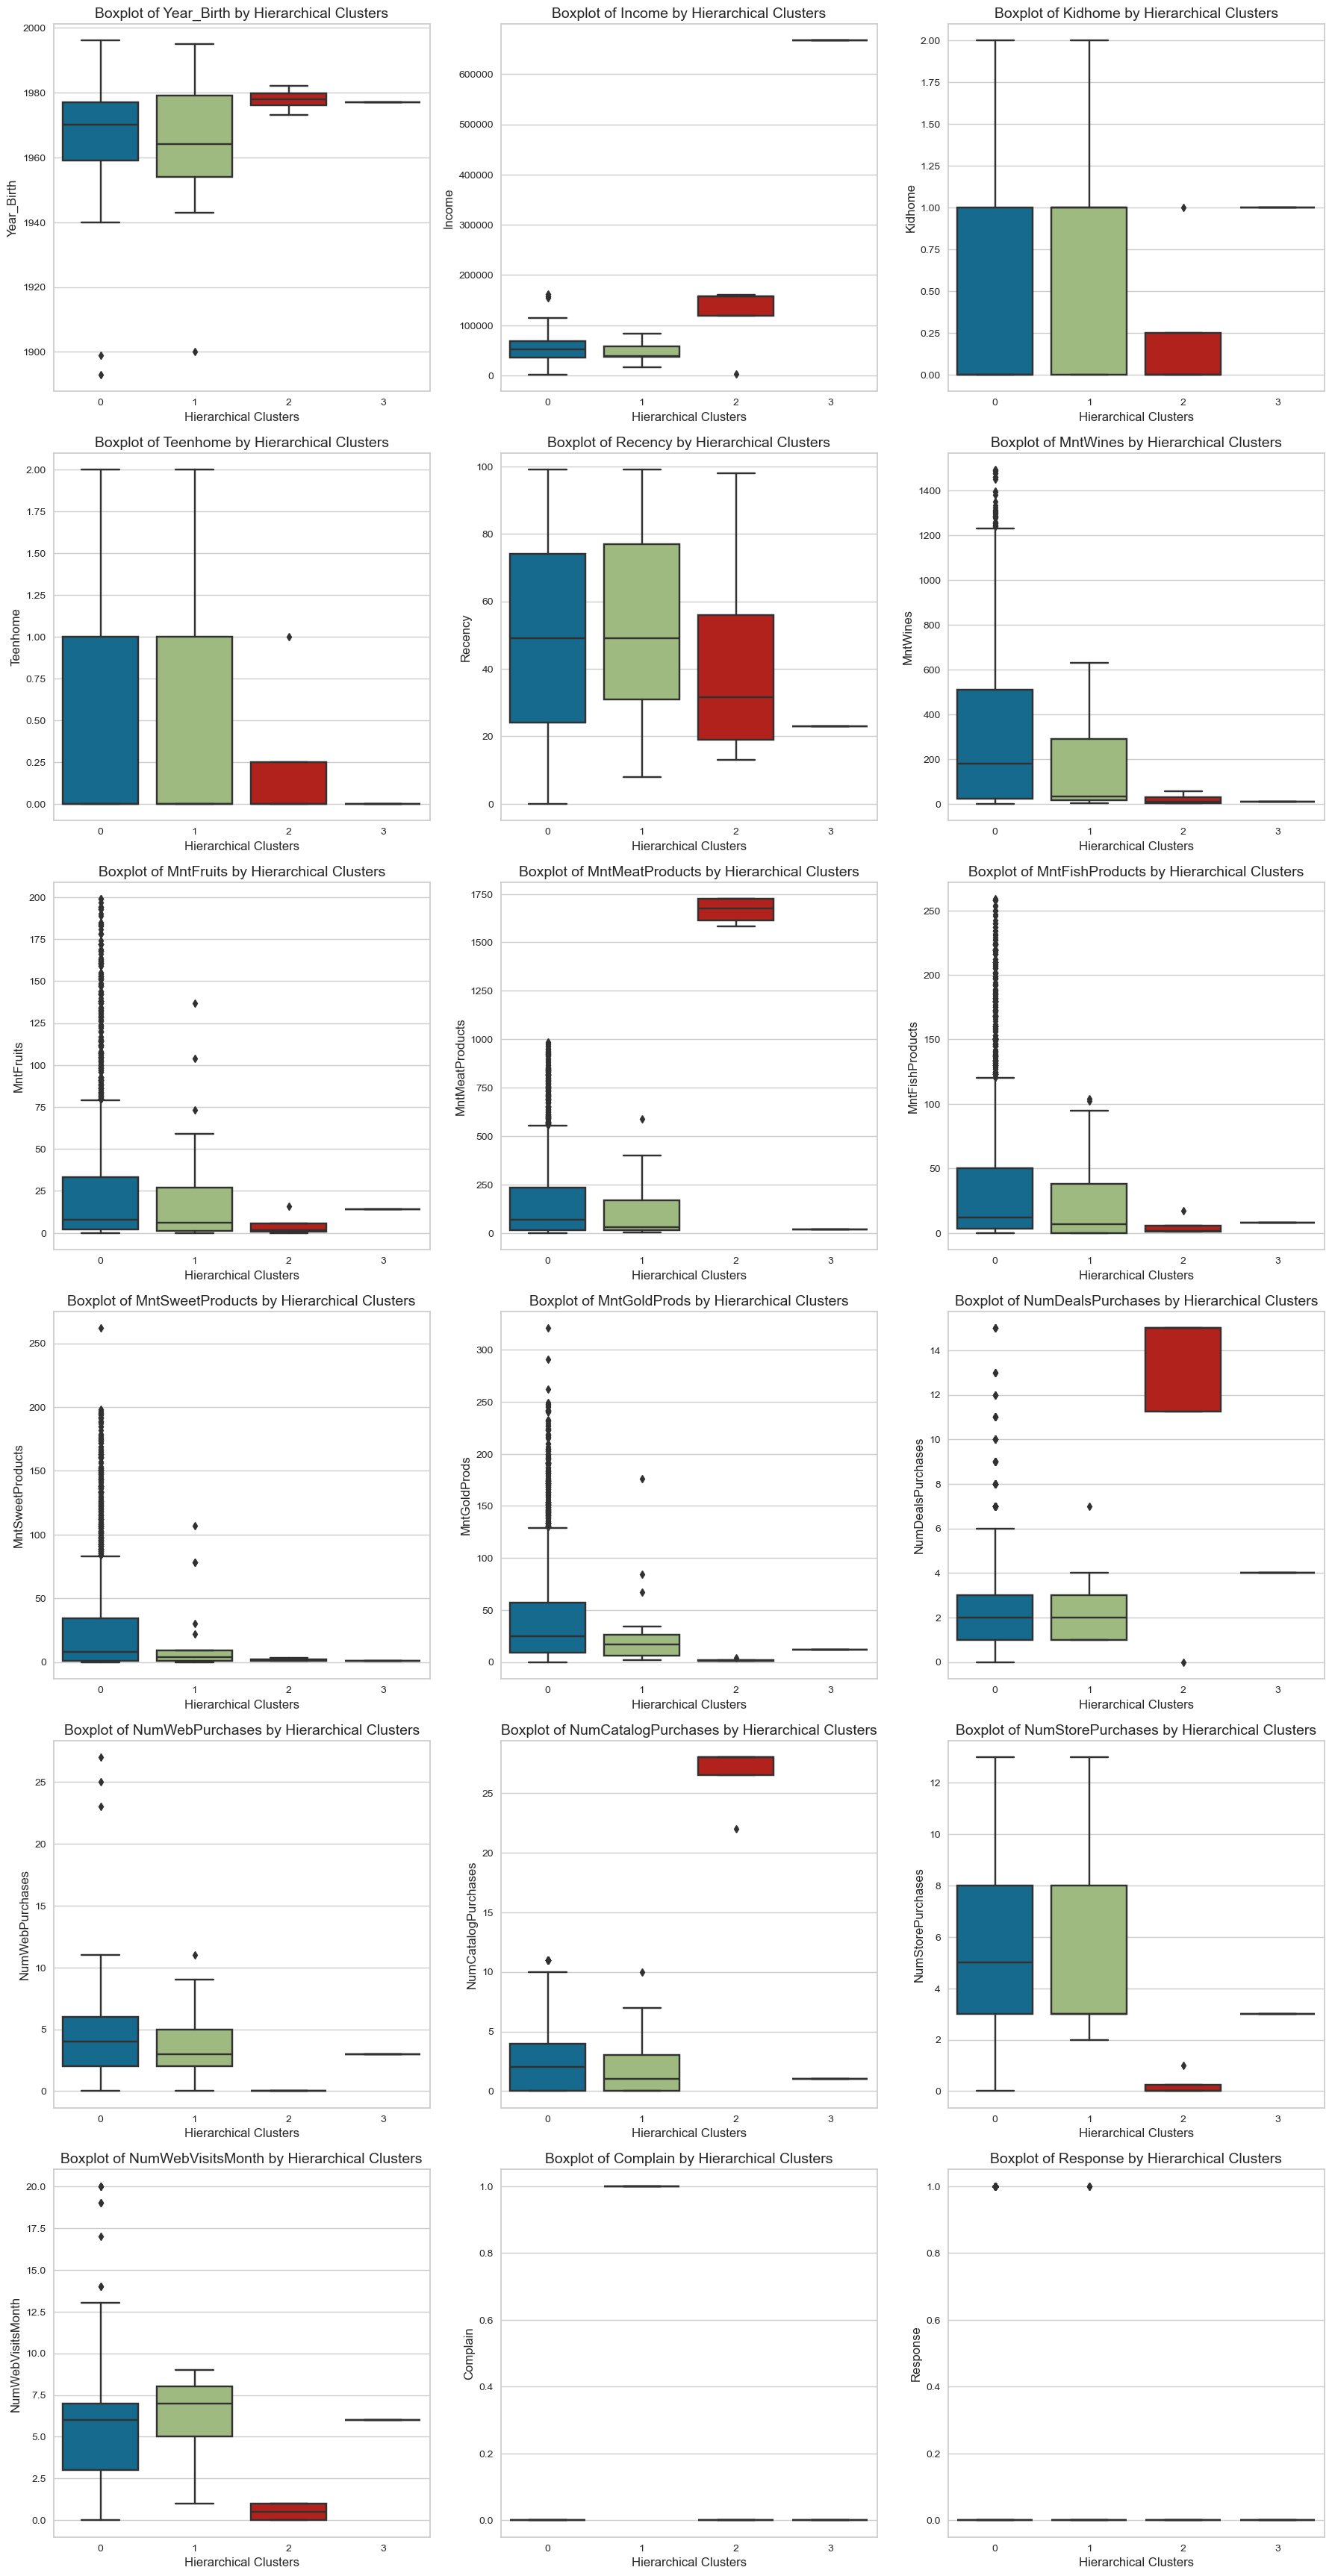

In [29]:
# Create boxplots for hierarchical clusters
plt.figure(figsize=(18, 40))

# Loop through the numerical columns
for idx, col in enumerate(numerical_columns):
    plt.subplot(7, 3, idx + 1) # Create subplots
    sns.boxplot(x='Hierarchical_Clusters', y=col, data=data_copy) # Create boxplots
    plt.title(f'Boxplot of {col} by Hierarchical Clusters', fontsize=14) # Set the title
    plt.xlabel('Hierarchical Clusters', fontsize=12) # Set the x-axis label
    plt.ylabel(col, fontsize=12) # Set the y-axis label

plt.tight_layout() # Adjust the plots to avoid overlapping
plt.show()

##### **Observations:**
1. Spending Patterns (MntWines, MntMeatProducts, MntFishProducts, etc.):
    - K-means: Shows clearer separation between clusters, with Cluster 2 (red) consistently showing highest spending across all product categories
    - Hierarchical: Less distinct separation, with most spending concentrated in Clusters 0 and 1 (blue and green)
    - Both methods identify a high-value customer segment, but K-means provides better differentiation

2. Demographics (Year_Birth, Income, Kidhome, Teenhome):
    - K-means: More balanced distribution across clusters for age and income
    - Hierarchical: Shows more extreme grouping, particularly for income in Cluster 2 (red)
    - Both methods indicate similar patterns for presence of children/teenagers

3. Purchase Behavior (NumWebPurchases, NumCatalogPurchases, NumStorePurchases):
    - K-means: More evenly distributed purchase patterns across clusters
    - Hierarchical: More concentrated in first two clusters, with less representation in others
    - K-means appears to better capture different shopping channel preferences

4. Campaign Response and Web Visits:
    - K-means: Cluster 2 (red) shows distinctly higher response rates
    - Hierarchical: Less clear differentiation in response patterns
    - NumWebVisitsMonth shows similar patterns in both methods but clearer separation in K-means

5. Overall Cluster Quality:
    - K-means shows more balanced cluster sizes and clearer separation between segments
    - Hierarchical clustering tends to create more imbalanced clusters with some very small segments
    - K-means appears to provide more actionable customer segments for marketing purposes

K-means clustering appears to provide more interpretable and balanced customer segments compared to hierarchical clustering for this dataset, with clearer differentiation in spending patterns and behavioral characteristics across clusters.

#### **Question 15**: Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot. What observations can be derived for each cluster from this plot?

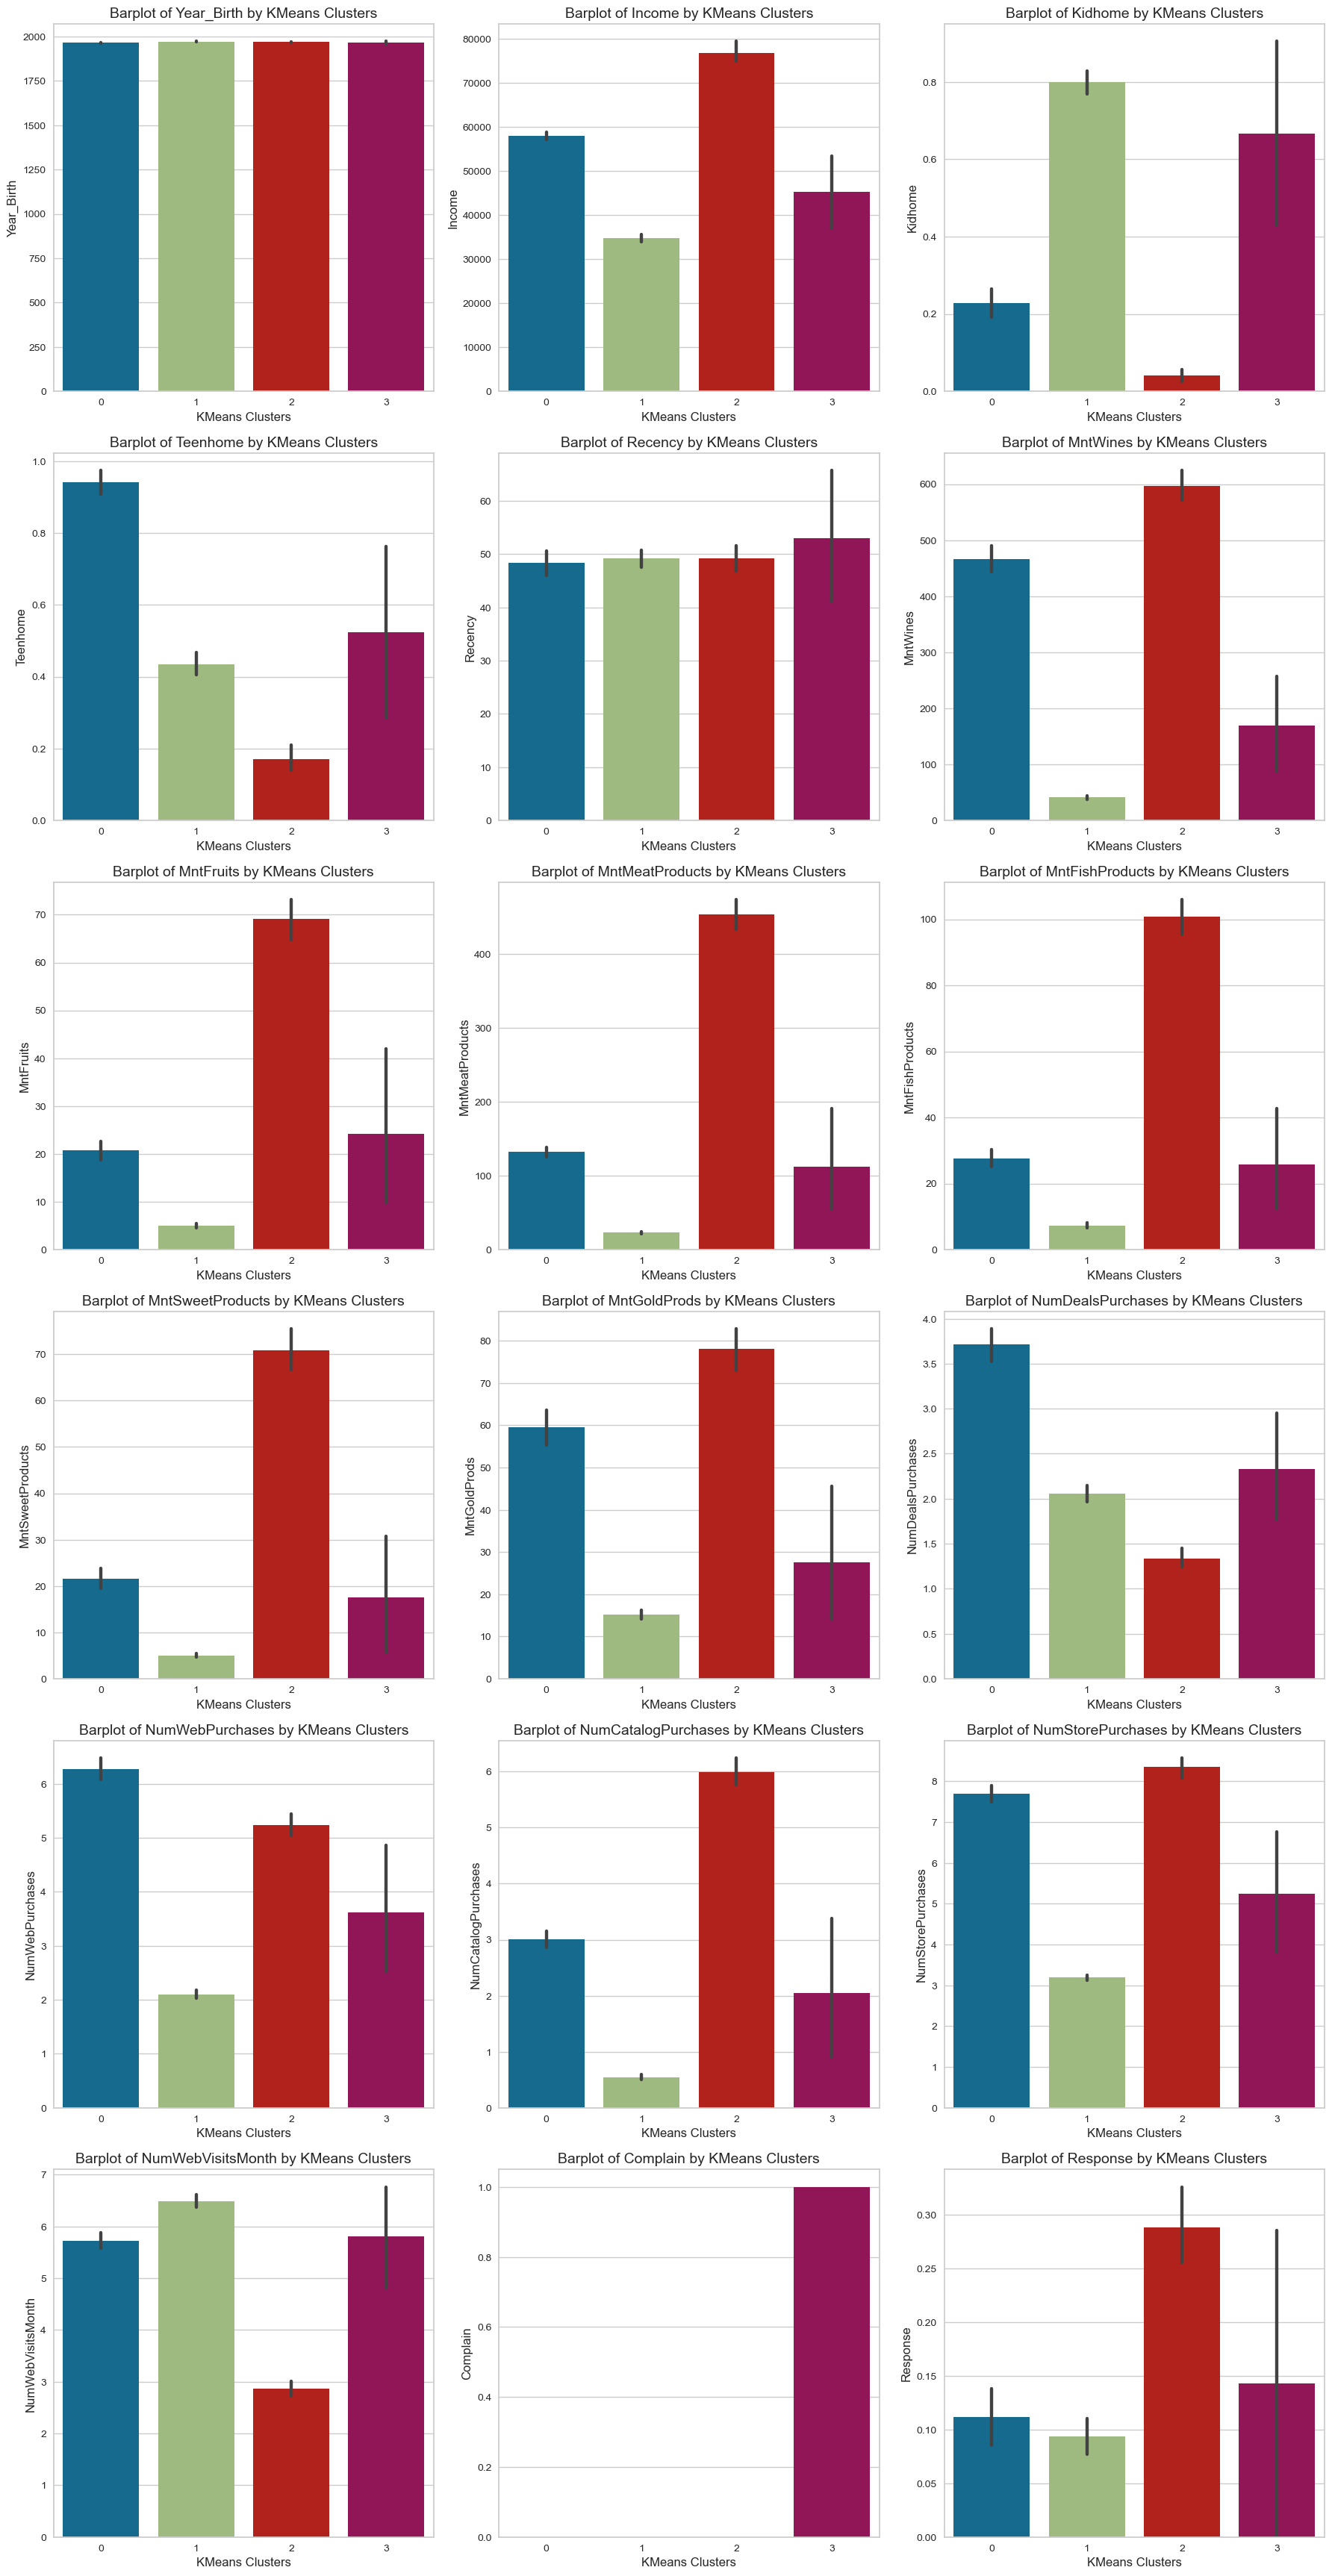

In [28]:
# Create barplots of numerical columns for KMeans clusters
plt.figure(figsize=(18, 40))

# Loop through the numerical columns
for idx, col in enumerate(numerical_columns):
    plt.subplot(7, 3, idx + 1) # Create subplots
    sns.barplot(x='KMeans_Clusters', y=col, data=data_copy) # Create barplots
    plt.title(f'Barplot of {col} by KMeans Clusters', fontsize=14) # Set the title
    plt.xlabel('KMeans Clusters', fontsize=12) # Set the x-axis label
    plt.ylabel(col, fontsize=12) # Set the y-axis label

plt.tight_layout() # Adjust the plots to avoid overlapping
plt.show()

##### **Observations:**
1. High-Value Customers (Cluster 2 - Red):
    - Significantly higher income (~70,000+)
    - Highest spending across all product categories (fruits, meat, fish, sweet products, gold products)
    - Highest number of catalog purchases
    - High store purchases
    - Highest response rate to campaigns
    - Notably fewer web visits per month, suggesting they may prefer direct purchasing
    - Lower Teenhome percentage, indicating fewer teenage children

2. Digital/Moderate Spending Shoppers (Cluster 0 - Blue):
    - Moderate income
    - Strong web purchase behavior (highest NumWebPurchases)
    - High number of deals purchases
    - Higher Teenhome percentage
    - Average web visits
    - Moderate spending across categories
    - Average response rate

3. Budget-Conscious/Low-Value Consumers (Cluster 1 - Green):
    - Lowest income level
    - Minimal spending across all product categories
    - Highest web visits per month, suggesting they browse more than they buy
    - Low response rate to campaigns
    - Moderate Kidhome and Teenhome levels
    - Lowest purchase metrics across channels

4. Mixed Value Customers (Cluster 3 - Purple):
    - Moderate-to-high income
    - Above-average spending, but below the high-value segment
    - Highest complain rate, suggesting potential service issues
    - Mixed behavior across purchase channels
    - Moderate response rate to campaigns

## **Business Recommedations**


- We have seen that 3 clusters are distinctly formed using both methodologies and the clusters are analogous to each other.
- Cluster 1 has premium customers with a high credit limit and more credit cards, indicating that they have more purchasing power. The customers in this group have a preference for online banking.
- Cluster 0 has customers who prefer to visit the bank for their banking needs than doing business online or over the phone. They have an average credit limit and a moderate number of credit cards.
- Cluster 2 has more overhead of customers calling in, and the bank may need to spend money on call centers.


Here are **5–7 actionable business recommendations** based on the cluster profiling:

---

### **1. Focus on Retaining High-Value Customers (Cluster 3)**
- **Offer Exclusive Loyalty Programs**: Provide tailored loyalty benefits, early access to products, and exclusive discounts to maintain engagement and drive repeat purchases.
- **Upsell and Cross-Sell**: Introduce premium products or bundles targeting their high spending patterns across product categories like wines, gold products, and meats.
- **Personalized Campaigns**: Use their high response rate to create personalized campaigns highlighting products they prefer.

---

### **2. Activate Potential in Moderate-Spending Customers (Cluster 2)**
- **Incentivize Higher Engagement**: Offer targeted discounts or special offers to encourage increased spending and purchases across channels.
- **Educate About Products**: Provide content (emails, guides, or social media) showcasing the value and uniqueness of products they don’t purchase frequently.
- **Improve Campaign Effectiveness**: Refine campaign messaging based on their moderate response rate to increase acceptance.

---

### **3. Reengage Low-Value Customers (Cluster 1)**
- **Win-Back Campaigns**: Implement campaigns specifically aimed at bringing back inactive customers, such as offering steep discounts or limited-time offers.
- **Understand Barriers to Engagement**: Conduct surveys or collect feedback to identify reasons for their low purchases and disengagement.
- **Promote Entry-Level Products**: Introduce affordable or trial-sized products to ease them into higher spending.

---

### **4. Convert Browsers into Buyers (Cluster 0)**
- **Optimize Website Experience**: Since Cluster 0 has high website visits but low spending, improve website navigation, showcase popular products, and streamline the checkout process.
- **Targeted Digital Campaigns**: Retarget these users with ads or emails featuring products they browsed but didn’t purchase.
- **Offer Online-Exclusive Discounts**: Provide web-only discounts or promotions to convert visits into purchases.

---

### **5. Strengthen Digital and Multi-Channel Strategies**
- **Seamless Omni-Channel Experience**: Ensure a consistent shopping experience across all channels (web, catalog, and store) to encourage cross-channel engagement, especially for Clusters 2 and 3.
- **Digital Campaigns for All Clusters**: Focus on targeted digital campaigns, particularly for Clusters 0 and 2, as they have moderate to high online engagement.

---

### **6. Develop Campaigns to Boost Responses**
- Use the insights from Clusters 2 and 3 (which show higher response rates) to refine campaign targeting and messaging. Emulate successful strategies used for Cluster 3 to increase responses across other segments.

---

### **7. Leverage Product-Specific Insights**
- Promote popular categories (e.g., wines, gold products) to high-value clusters, while running introductory campaigns for less-engaged clusters to familiarize them with premium products.

---

By focusing on these strategies, the company can enhance engagement, increase revenue, and strengthen customer loyalty across all clusters.